In [1]:
import requests
from bs4 import BeautifulSoup
from lxml import etree
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pylab import rcParams
import matplotlib.animation as animation
from matplotlib import rc
import unittest
from pylab import rcParams


In [48]:
r = requests.get('https://inmuebles.mercadolibre.com.mx/casas/venta/monterrey')

In [49]:
r.status_code

200

In [50]:
soup = BeautifulSoup(r.content,'html.parser')

In [5]:
dom = etree.HTML(str(soup))
titulos =  dom.xpath('//li[@class="ui-search-layout__item"]//div[@class="ui-search-result__content-wrapper shops__result-content-wrapper"]//div[@class="ui-search-item__group ui-search-item__group--title shops__items-group"]/h2')
titulos = [i.text for i in titulos]
titulos

['Casa En Venta Bosques De Valle Alto Al Sur De Monterrey',
 'Casa En Venta Canterías 1er. Sector Al Sur De Monterrey',
 'Casa En Venta Con Alberca Y En Esquina Cumbres 2o Sector Mon',
 'Casa En Venta Campo De Golf La Herradura, Carretera Nacional',
 'Casa En Venta Col. Venustiano Carranza, Monterrey',
 'Casa Sierra Alta',
 'Casa En Venta En Cumbres Elite Privada Uno',
 'Casa En Venta O Renta, Altavista  Sur De Monterrey',
 'Casa En Venta La Herradura Al Sur De Monterrey',
 'Casa En Venta En Lagos Del Bosque, Sur De Monterrey',
 'Casa En Venta En Dominio Cumbres Al Poniente De Monterrey',
 'Casa En Venta Sierra Alta Al Sur De Monterrey',
 'Casa En Venta Cumbres Elite Premier Al Poniente De Monterrey',
 'Casa En Venta Mitras Centro, Monterrey',
 'Casa En Venta Fracc. Centro Al Sur De Monterrey',
 'Casa En Venta Valle Alto Al Sur De Monterrey',
 'Casa En Venta Cumbres Elite Al Poniente De Monterrey',
 'Casa En Venta En Cumbres San Agustín, Poniente De Monterrey',
 'Casa En Venta Churubus

In [6]:
urls = soup.find_all('a',attrs = {"class": "ui-search-result__content ui-search-link"})
#urls[0].get('href')
urls = [i.get('href') for i in urls]
urls

['https://casa.mercadolibre.com.mx/MLM-1590947177-casa-en-venta-bosques-de-valle-alto-al-sur-de-monterrey-_JM#position=1&search_layout=grid&type=item&tracking_id=c215a15f-bcf9-4029-9734-e12673cb9615',
 'https://casa.mercadolibre.com.mx/MLM-1590409913-casa-en-venta-canterias-1er-sector-al-sur-de-monterrey-_JM#position=2&search_layout=grid&type=item&tracking_id=c215a15f-bcf9-4029-9734-e12673cb9615',
 'https://casa.mercadolibre.com.mx/MLM-1443888460-casa-en-venta-con-alberca-y-en-esquina-cumbres-2o-sector-mon-_JM#position=3&search_layout=grid&type=item&tracking_id=c215a15f-bcf9-4029-9734-e12673cb9615',
 'https://casa.mercadolibre.com.mx/MLM-1590422818-casa-en-venta-campo-de-golf-la-herradura-carretera-nacional-_JM#position=4&search_layout=grid&type=item&tracking_id=c215a15f-bcf9-4029-9734-e12673cb9615',
 'https://casa.mercadolibre.com.mx/MLM-1590927770-casa-en-venta-col-venustiano-carranza-monterrey-_JM#position=5&search_layout=grid&type=item&tracking_id=c215a15f-bcf9-4029-9734-e12673cb96

In [7]:
dom = etree.HTML(str(soup))
precios = dom.xpath('//li[@class="ui-search-layout__item"]//div[@class="ui-search-result__content-wrapper shops__result-content-wrapper"]//div[@class="ui-search-item__group ui-search-item__group--price shops__items-group"]//div[@class="ui-search-item__group__element ui-search-price__part-without-link shops__items-group-details"]/div/div[1]//span[@class="price-tag-amount"]/span[2]')
precios = [i.text for i in precios]
precios

['12,455,000',
 '22,000,000',
 '14,500,000',
 '21,800,000',
 '2,500,000',
 '15,868,000',
 '7,000,000',
 '27,000,000',
 '25,000,000',
 '4,500,000',
 '2,920,000',
 '20,800,000',
 '5,200,000',
 '4,850,000',
 '2,650,000',
 '21,000,000',
 '4,798,000',
 '3,590,000',
 '4,500,000',
 '6,548,000',
 '2,900,000',
 '5,850,000',
 '11,500,000',
 '21,700,000',
 '4,990,000',
 '10,850,000',
 '14,000,000',
 '11,000,000',
 '10,900,000',
 '6,550,000',
 '16,300,000',
 '6,680,000',
 '8,500,000',
 '12,950,000',
 '6,780,000',
 '4,150,000',
 '7,600,000',
 '4,790,000',
 '1,950,000',
 '3,300,000',
 '935,000',
 '903,000',
 '37,000,000',
 '724,000',
 '6,900,000',
 '6,690,000',
 '15,400,000',
 '41,800,000']

In [8]:
#//li[@class="ui-search-layout__item"]//div[@class="ui-search-result__content-wrapper shops__result-content-wrapper"]//div[@class="ui-search-item__group ui-search-item__group--attributes shops__items-group"]/ul//li[@class="ui-search-card-attributes__attribute"]
dom = etree.HTML(str(soup))
metros2 = dom.xpath('//li[@class="ui-search-layout__item"]//div[@class="ui-search-result__content-wrapper shops__result-content-wrapper"]//div[@class="ui-search-item__group ui-search-item__group--attributes shops__items-group"]/ul/li[1]')
metros2 = [i.text for i in metros2]
metros2

['517 m² construidos',
 '1,100 m² construidos',
 '717 m² construidos',
 '240 m² construidos',
 '244 m² construidos',
 '672 m² construidos',
 '388 m² construidos',
 '1,300 m² construidos',
 '687 m² construidos',
 '152 m² construidos',
 '200 m² construidos',
 '736 m² construidos',
 '250 m² construidos',
 '220 m² construidos',
 '138 m² construidos',
 '925 m² construidos',
 '287 m² construidos',
 '195 m² construidos',
 '214 m² construidos',
 '204 m² construidos',
 '146 m² construidos',
 '330 m² construidos',
 '350 m² construidos',
 '606 m² construidos',
 '245 m² construidos',
 '280 m² construidos',
 '442 m² construidos',
 '312 m² construidos',
 '345 m² construidos',
 '324 m² construidos',
 '545 m² construidos',
 '365 m² construidos',
 '325 m² construidos',
 '430 m² construidos',
 '180 m² construidos',
 '148 m² construidos',
 '430 m² construidos',
 '155 m² construidos',
 '1 m² construidos',
 '138 m² construidos',
 '110 m² construidos',
 '312 m² construidos',
 '1,100 m² construidos',
 '160 m

In [9]:
dom = etree.HTML(str(soup))
recamaras = dom.xpath('//li[@class="ui-search-layout__item"]//div[@class="ui-search-result__content-wrapper shops__result-content-wrapper"]//div[@class="ui-search-item__group ui-search-item__group--attributes shops__items-group"]/ul/li[2]')
recamaras = [i.text for i in recamaras]
recamaras

['3 recs.',
 '5 recs.',
 '4 recs.',
 '3 recs.',
 '4 recs.',
 '4 recs.',
 '3 recs.',
 '3 recs.',
 '3 recs.',
 '2 recs.',
 '3 recs.',
 '3 recs.',
 '3 recs.',
 '4 recs.',
 '3 recs.',
 '3 recs.',
 '4 recs.',
 '3 recs.',
 '3 recs.',
 '3 recs.',
 '3 recs.',
 '3 recs.',
 '3 recs.',
 '3 recs.',
 '3 recs.',
 '3 recs.',
 '3 recs.',
 '3 recs.',
 '3 recs.',
 '3 recs.',
 '4 recs.',
 '3 recs.',
 '4 recs.',
 '4 recs.',
 '3 recs.',
 '3 recs.',
 '3 recs.',
 '2 recs.',
 '3 recs.',
 '3 recs.',
 '3 recs.',
 '6 recs.',
 '4 recs.',
 '3 recs.',
 '4 recs.',
 '3 recs.',
 '3 recs.']

In [10]:
dom = etree.HTML(str(soup))
direccion = dom.xpath('//li[@class="ui-search-layout__item"]//div[@class="ui-search-result__content-wrapper shops__result-content-wrapper"]//div[@class="ui-search-item__group ui-search-item__group--location shops__items-group"]/span')
direccion = [i.text for i in direccion]
direccion

['Bosques De Valle Alto, Bosques De Valle Alto 2 Etapa, Monterrey, Nuevo León',
 'Canterías, Canterías 1 Sector, Monterrey, Nuevo León',
 'Monte Blanco, Las Cumbres 2 Sector, Monterrey, Nuevo León',
 'La  Herradura, Residencial Y Club De Golf La Herradura, Monterrey, Nuevo León',
 'Venustiano Carranza, Venustiano Carranza, Monterrey, Nuevo León',
 'Sierra Alta 90 Sector, Sin Nombre De Colonia 54, Monterrey, Nuevo León, México, Sierra Alta 9o Sector, Monterrey, Nuevo León',
 'Cumbres Elite, Cumbres Elite Privadas, Monterrey, Nuevo León',
 'Col. Altavista, Altavista, Monterrey, Nuevo León',
 'La Herradura, Residencial Y Club De Golf La Herradura, Monterrey, Nuevo León',
 'Lagos Del Bosque, Lagos Del Bosque, Monterrey, Nuevo León',
 'Dominio Cumbres, Otra Colonia, García, Nuevo León',
 'Sierra Alta, Sierra Alta 2  Sector, Monterrey, Nuevo León',
 'Cumbres Elite Premier, Cumbres Elite Premier, García, Nuevo León',
 'Mitras Centro, Mitras Centro, Monterrey, Nuevo León',
 'Col Ancira, Ancira

In [11]:
dom = etree.HTML(str(soup))
tipo = dom.xpath('//li[@class="ui-search-layout__item"]//div[@class="ui-search-result__content-wrapper shops__result-content-wrapper"]//div[@class="ui-search-item__group ui-search-item__group--title shops__items-group"]/span')
tipo = [i.text for i in tipo]
tipo

['Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta',
 'Casa en venta']

In [12]:
#df = pd.DataFrame({"títulos": titulos, "urls": urls, "precios": precios, "descripción": descripción, "metros2": metros2, "recamaras": recamaras, "tipo": tipo})
#df
#df.to_csv("casas_renta_monterrey.csv")

In [13]:
siguiente = dom.xpath('//div[@class="ui-search-pagination shops__pagination-content"]/ul/li[contains(@class,"--next")]/a')[0].get('href')
siguiente

'https://inmuebles.mercadolibre.com.mx/casas/venta/monterrey_Desde_49_NoIndex_True'

In [14]:
ini = soup.find('span', attrs = {"class":"andes-pagination__link"}).text
ini = int(ini)
ini

1

In [15]:
can = soup.find('li', attrs = {"class":"andes-pagination__page-count"})
can = int(can.text.split(" ")[1])
can

42

In [16]:
lista_titulos = []
lista_urls = []
lista_precios = []
lista_metros2 = []
lista_recamaras = []
lista_direccion = []
lista_tipo = []

In [17]:
siguiente = 'https://inmuebles.mercadolibre.com.mx/casas/venta/monterrey'
while True:
    r = requests.get(siguiente)
    if r.status_code ==200:
        soup = BeautifulSoup(r.content,'html.parser')
        #Titulos
        dom = etree.HTML(str(soup))
        titulos =  dom.xpath('//li[@class="ui-search-layout__item"]//div[@class="ui-search-result__content-wrapper shops__result-content-wrapper"]//div[@class="ui-search-item__group ui-search-item__group--title shops__items-group"]/h2')
        titulos = [i.text for i in titulos]
        lista_titulos.extend(titulos)
        #Urls
        urls = soup.find_all('a',attrs = {"class": "ui-search-result__content ui-search-link"})
        urls = [i.get('href') for i in urls]
        lista_urls.extend(urls)
        #Precios
        dom = etree.HTML(str(soup))
        precios = dom.xpath('//li[@class="ui-search-layout__item"]//div[@class="ui-search-result__content-wrapper shops__result-content-wrapper"]//div[@class="ui-search-item__group ui-search-item__group--price shops__items-group"]//div[@class="ui-search-item__group__element ui-search-price__part-without-link shops__items-group-details"]/div/div[1]//span[@class="price-tag-amount"]/span[2]')
        precios = [i.text for i in precios]
        lista_precios.extend(precios)
        #Metros2
        dom = etree.HTML(str(soup))
        metros2 = dom.xpath('//li[@class="ui-search-layout__item"]//div[@class="ui-search-result__content-wrapper shops__result-content-wrapper"]//div[@class="ui-search-item__group ui-search-item__group--attributes shops__items-group"]/ul/li[1]')
        metros2 = [i.text for i in metros2]
        lista_metros2.extend(metros2)
        #Recamaras
        dom = etree.HTML(str(soup))
        recamaras = dom.xpath('//li[@class="ui-search-layout__item"]//div[@class="ui-search-result__content-wrapper shops__result-content-wrapper"]//div[@class="ui-search-item__group ui-search-item__group--attributes shops__items-group"]/ul/li[2]')
        recamaras = [i.text for i in recamaras]
        lista_recamaras.extend(recamaras)
        #Descripcion
        dom = etree.HTML(str(soup))
        direccion = dom.xpath('//li[@class="ui-search-layout__item"]//div[@class="ui-search-result__content-wrapper shops__result-content-wrapper"]//div[@class="ui-search-item__group ui-search-item__group--location shops__items-group"]/span')
        direccion = [i.text for i in direccion]
        lista_direccion.extend(direccion)
        #Tipo
        dom = etree.HTML(str(soup))
        tipo = dom.xpath('//li[@class="ui-search-layout__item"]//div[@class="ui-search-result__content-wrapper shops__result-content-wrapper"]//div[@class="ui-search-item__group ui-search-item__group--title shops__items-group"]/span')
        tipo = [i.text for i in tipo]
        lista_tipo.extend(tipo)
        ini = soup.find('span', attrs = {"class":"andes-pagination__link"}).text
        ini = int(ini)
        can = soup.find('li', attrs = {"class":"andes-pagination__page-count"})
        can = int(can.text.split(" ")[1])
    else:
        break
    print(ini,can)
    if ini==can:
        break     
    siguiente = dom.xpath('//div[@class="ui-search-pagination shops__pagination-content"]/ul/li[contains(@class,"--next")]/a')[0].get('href')    

1 42
2 42
3 42
4 42
5 42
6 42
7 42
8 42
9 42
10 42
11 42
12 42
13 42
14 42
15 42
16 42
17 42
18 42
19 42
20 42
21 42
22 42
23 42
24 42
25 42
26 42
27 42
28 42
29 42
30 42
31 42
32 42
33 42
34 42
35 42
36 42
37 42
38 42
39 42
40 42
41 42
42 42


In [18]:
#len(listatitulos)

In [19]:
#crear el archivo en excel
#ml.to_csv('Inmuebles_zapopan.csv')

In [20]:
ml = ({"titulos": lista_titulos, "urls": lista_urls, "precios": lista_precios, "direccion": lista_direccion, "metros2": lista_metros2, "recamaras": lista_recamaras, "tipo": lista_tipo})
#cuando no se extraen todos los datos porque algunos no tienen datos en una casilla, se usa función que está abajo
ml = pd.DataFrame.from_dict(ml, orient='index')
ml = ml.transpose()
df = pd.concat([ml])
ml.head()

,titulos,urls,precios,direccion,metros2,recamaras,tipo
0,Casa En Venta Bosques De Valle Alto Al Sur De ...,https://casa.mercadolibre.com.mx/MLM-159094717...,"12,455,000","Bosques De Valle Alto, Bosques De Valle Alto 2...",517 m² construidos,3 recs.,Casa en venta
1,Casa En Venta Canterías 1er. Sector Al Sur De ...,https://casa.mercadolibre.com.mx/MLM-159040991...,"22,000,000","Canterías, Canterías 1 Sector, Monterrey, Nuev...","1,100 m² construidos",5 recs.,Casa en venta
2,Casa En Venta Con Alberca Y En Esquina Cumbres...,https://casa.mercadolibre.com.mx/MLM-144388846...,"14,500,000","Monte Blanco, Las Cumbres 2 Sector, Monterrey,...",717 m² construidos,4 recs.,Casa en venta
3,"Casa En Venta Campo De Golf La Herradura, Carr...",https://casa.mercadolibre.com.mx/MLM-159042281...,"21,800,000","La Herradura, Residencial Y Club De Golf La H...",240 m² construidos,3 recs.,Casa en venta
4,"Casa En Venta Col. Venustiano Carranza, Monterrey",https://casa.mercadolibre.com.mx/MLM-159092777...,"2,500,000","Venustiano Carranza, Venustiano Carranza, Mont...",244 m² construidos,4 recs.,Casa en venta


In [21]:
#convertir la columna de datos "precios" remplezando caracteres, en este caso "," para así hacer análisis exploratorio de datos
#Y ahora remplazamos la palabra "construidos"
ml['metros2'] = ml['metros2'].replace('construidos','', regex=True).astype(str)
ml['metros2'] = ml['metros2'].replace(',','', regex=True).astype(str)
ml["precios"] = ml["precios"].replace('[\$\,]|\.\d*', '', regex=True).astype(float)
ml["precios"] = ml["precios"].replace('[\$\,]|\.\d*', '', regex=True).astype(int)
ml.head()

,titulos,urls,precios,direccion,metros2,recamaras,tipo
0,Casa En Venta Bosques De Valle Alto Al Sur De ...,https://casa.mercadolibre.com.mx/MLM-159094717...,12455000,"Bosques De Valle Alto, Bosques De Valle Alto 2...",517 m²,3 recs.,Casa en venta
1,Casa En Venta Canterías 1er. Sector Al Sur De ...,https://casa.mercadolibre.com.mx/MLM-159040991...,22000000,"Canterías, Canterías 1 Sector, Monterrey, Nuev...",1100 m²,5 recs.,Casa en venta
2,Casa En Venta Con Alberca Y En Esquina Cumbres...,https://casa.mercadolibre.com.mx/MLM-144388846...,14500000,"Monte Blanco, Las Cumbres 2 Sector, Monterrey,...",717 m²,4 recs.,Casa en venta
3,"Casa En Venta Campo De Golf La Herradura, Carr...",https://casa.mercadolibre.com.mx/MLM-159042281...,21800000,"La Herradura, Residencial Y Club De Golf La H...",240 m²,3 recs.,Casa en venta
4,"Casa En Venta Col. Venustiano Carranza, Monterrey",https://casa.mercadolibre.com.mx/MLM-159092777...,2500000,"Venustiano Carranza, Venustiano Carranza, Mont...",244 m²,4 recs.,Casa en venta


In [22]:
# Munge Location data
ml['estado'] = ml[['direccion']].applymap(lambda x: x.split(',')[-1].strip())
ml['colonia'] = ml[['direccion']].applymap(lambda x: x.split('-')[-1].split(',')[0].strip())
ml['ciudad'] = ml[['direccion']].applymap(lambda x: x.split(',')[-2].split(',')[-1].split(',')[-1])
ml.head()

,titulos,urls,precios,direccion,metros2,recamaras,tipo,estado,colonia,ciudad
0,Casa En Venta Bosques De Valle Alto Al Sur De ...,https://casa.mercadolibre.com.mx/MLM-159094717...,12455000,"Bosques De Valle Alto, Bosques De Valle Alto 2...",517 m²,3 recs.,Casa en venta,Nuevo León,Bosques De Valle Alto,Monterrey
1,Casa En Venta Canterías 1er. Sector Al Sur De ...,https://casa.mercadolibre.com.mx/MLM-159040991...,22000000,"Canterías, Canterías 1 Sector, Monterrey, Nuev...",1100 m²,5 recs.,Casa en venta,Nuevo León,Canterías,Monterrey
2,Casa En Venta Con Alberca Y En Esquina Cumbres...,https://casa.mercadolibre.com.mx/MLM-144388846...,14500000,"Monte Blanco, Las Cumbres 2 Sector, Monterrey,...",717 m²,4 recs.,Casa en venta,Nuevo León,Monte Blanco,Monterrey
3,"Casa En Venta Campo De Golf La Herradura, Carr...",https://casa.mercadolibre.com.mx/MLM-159042281...,21800000,"La Herradura, Residencial Y Club De Golf La H...",240 m²,3 recs.,Casa en venta,Nuevo León,La Herradura,Monterrey
4,"Casa En Venta Col. Venustiano Carranza, Monterrey",https://casa.mercadolibre.com.mx/MLM-159092777...,2500000,"Venustiano Carranza, Venustiano Carranza, Mont...",244 m²,4 recs.,Casa en venta,Nuevo León,Venustiano Carranza,Monterrey


In [23]:
# Verify Location Stats
print('Número de puntos de datos totales:', len(ml))
print('Número de colonias únicas', ml.colonia.value_counts().count())

Número de puntos de datos totales: 2016
Número de colonias únicas 879


<AxesSubplot:>

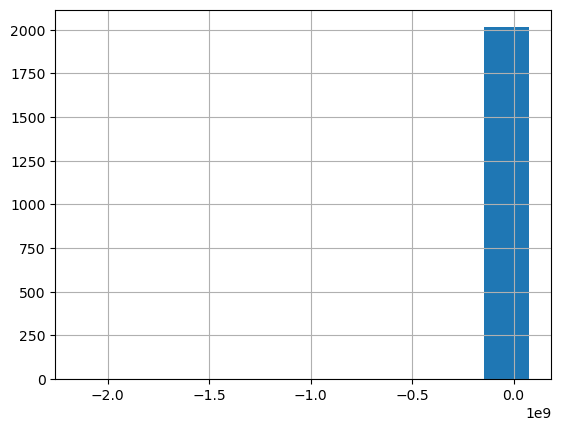

In [24]:
ml['precios'].hist()

In [25]:
print('Stats per Delegation with all Data')
ml.groupby('colonia').precios.describe().sort_values(by=['mean'],ascending=True)

Stats per Delegation with all Data


,count,mean,std,min,25%,50%,75%,max
colonia,,,,,,,,
Antiguo Camino A Villa De Santiago,4.0,-530978412.0,1.077670e+09,-2.147484e+09,542638412.0,7790000.0,7915000.0,7990000.0
Fermio 1,1.0,421500.0,NaN,4.215000e+05,421500.0,421500.0,421500.0,421500.0
Avenida Gladiola 9023,2.0,435000.0,0.000000e+00,4.350000e+05,435000.0,435000.0,435000.0,435000.0
128,2.0,439000.0,1.414214e+04,4.290000e+05,434000.0,439000.0,444000.0,449000.0
Barajas,1.0,525000.0,NaN,5.250000e+05,525000.0,525000.0,525000.0,525000.0
...,...,...,...,...,...,...,...,...
Renacimiento,1.0,46000000.0,NaN,4.600000e+07,46000000.0,46000000.0,46000000.0,46000000.0
Renacimiento 1,1.0,50000000.0,NaN,5.000000e+07,50000000.0,50000000.0,50000000.0,50000000.0
Donatello,1.0,50000000.0,NaN,5.000000e+07,50000000.0,50000000.0,50000000.0,50000000.0


In [26]:
 # Find outliers
outbounds = ml.groupby('colonia').precios.agg(['mean', 'std']).reset_index()
# Compute Upper and Lower bounds
outbounds['upper'] = outbounds['mean'] + outbounds['std']
outbounds['lower'] = outbounds['mean'] - outbounds['std']
del outbounds['mean'], outbounds['std']
ml = pd.merge(ml, outbounds, on='colonia', how='inner')
ml.head()

,titulos,urls,precios,direccion,metros2,recamaras,tipo,estado,colonia,ciudad,upper,lower
0,Casa En Venta Bosques De Valle Alto Al Sur De ...,https://casa.mercadolibre.com.mx/MLM-159094717...,12455000,"Bosques De Valle Alto, Bosques De Valle Alto 2...",517 m²,3 recs.,Casa en venta,Nuevo León,Bosques De Valle Alto,Monterrey,1.309175e+07,1.051625e+07
1,Venta De Casa En Bosques De Valle Alto Carrete...,https://casa.mercadolibre.com.mx/MLM-871018468...,12000000,"Bosques De Valle Alto, Monterrey, Nuevo León",599 m²,3 recs.,Casa en venta,Nuevo León,Bosques De Valle Alto,Monterrey,1.309175e+07,1.051625e+07
2,Venta De Casa En Jardines De Valle Alto Carret...,https://casa.mercadolibre.com.mx/MLM-871014996...,10500000,"Bosques De Valle Alto, Monterrey, Nuevo León",407 m²,5 recs.,Casa en venta,Nuevo León,Bosques De Valle Alto,Monterrey,1.309175e+07,1.051625e+07
3,"Casa Venta Bosques De Valle Alto, Sierra Alta",https://casa.mercadolibre.com.mx/MLM-143884384...,11200000,"Bosques De Valle Alto, Monterrey, Nuevo León",500 m²,9 recs.,Casa en venta,Nuevo León,Bosques De Valle Alto,Monterrey,1.309175e+07,1.051625e+07
4,"Casa En Venta En Bosques De Valle Alto, Monter...",https://casa.mercadolibre.com.mx/MLM-145264544...,11200000,"Bosques De Valle Alto, Monterrey, Nuevo León",513 m²,3 recs.,Casa en venta,Nuevo León,Bosques De Valle Alto,Monterrey,1.309175e+07,1.051625e+07


In [27]:
# Filter Non outliers
data = ml[(ml['precios'] < ml['upper']) & (ml['precios'] > ml['lower'])]
print('Total inliers:', len(data))
data.head(50)

Total inliers: 1047


,titulos,urls,precios,direccion,metros2,recamaras,tipo,estado,colonia,ciudad,upper,lower
0,Casa En Venta Bosques De Valle Alto Al Sur De ...,https://casa.mercadolibre.com.mx/MLM-159094717...,12455000,"Bosques De Valle Alto, Bosques De Valle Alto 2...",517 m²,3 recs.,Casa en venta,Nuevo León,Bosques De Valle Alto,Monterrey,1.309175e+07,1.051625e+07
1,Venta De Casa En Bosques De Valle Alto Carrete...,https://casa.mercadolibre.com.mx/MLM-871018468...,12000000,"Bosques De Valle Alto, Monterrey, Nuevo León",599 m²,3 recs.,Casa en venta,Nuevo León,Bosques De Valle Alto,Monterrey,1.309175e+07,1.051625e+07
3,"Casa Venta Bosques De Valle Alto, Sierra Alta",https://casa.mercadolibre.com.mx/MLM-143884384...,11200000,"Bosques De Valle Alto, Monterrey, Nuevo León",500 m²,9 recs.,Casa en venta,Nuevo León,Bosques De Valle Alto,Monterrey,1.309175e+07,1.051625e+07
4,"Casa En Venta En Bosques De Valle Alto, Monter...",https://casa.mercadolibre.com.mx/MLM-145264544...,11200000,"Bosques De Valle Alto, Monterrey, Nuevo León",513 m²,3 recs.,Casa en venta,Nuevo León,Bosques De Valle Alto,Monterrey,1.309175e+07,1.051625e+07
7,"Casas En Venta En Bosques De Valle Alto, Monte...",https://casa.mercadolibre.com.mx/MLM-154867401...,12455000,"Bosques De Valle Alto, Monterrey, Nuevo León",517 m²,3 recs.,Casa en venta,Nuevo León,Bosques De Valle Alto,Monterrey,1.309175e+07,1.051625e+07
8,"Casas En Venta En Bosques De Valle Alto, Monte...",https://casa.mercadolibre.com.mx/MLM-153251984...,11680000,"Bosques De Valle Alto, Monterrey, Nuevo León",422 m²,3 recs.,Casa en venta,Nuevo León,Bosques De Valle Alto,Monterrey,1.309175e+07,1.051625e+07
11,Casa En Venta Con Alberca Y En Esquina Cumbres...,https://casa.mercadolibre.com.mx/MLM-144388846...,14500000,"Monte Blanco, Las Cumbres 2 Sector, Monterrey,...",717 m²,4 recs.,Casa en venta,Nuevo León,Monte Blanco,Monterrey,1.812132e+07,1.387868e+07
12,Casa En Venta En Cumbres 2do Sector,https://casa.mercadolibre.com.mx/MLM-137586753...,17500000,"Monte Blanco, Cumbres 2do. Sector, Monterrey, ...",717 m²,3 recs.,Casa en venta,Nuevo León,Monte Blanco,Monterrey,1.812132e+07,1.387868e+07
15,Casa Sierra Alta,https://casa.mercadolibre.com.mx/MLM-147965542...,15868000,"Sierra Alta 90 Sector, Sin Nombre De Colonia 5...",672 m²,4 recs.,Casa en venta,Nuevo León,Sierra Alta 90 Sector,Monterrey,1.793907e+07,3.796932e+06
16,Casa Sierra Alta Bosques De Valle Alto Primer...,https://casa.mercadolibre.com.mx/MLM-149415453...,5868000,"Sierra Alta 90 Sector, Sin Nombre De Colonia 6...",678 m²,5 recs.,Casa en venta,Nuevo León,Sierra Alta 90 Sector,Monterrey,1.793907e+07,3.796932e+06


In [28]:
print('Stats per Conlony with inliers data')
data.groupby('colonia').precios.describe().sort_values(by=['mean'],ascending=False)

Stats per Conlony with inliers data


,count,mean,std,min,25%,50%,75%,max
colonia,,,,,,,,
Casa En Venta Portal Del Huajuco,2.0,4.090000e+07,1.272792e+06,40000000.0,40450000.00,40900000.0,41350000.00,41800000.0
Casa En Venta Colonia Vista Hermosa Zona Monterrey,2.0,3.465000e+07,2.595082e+07,16300000.0,25475000.00,34650000.0,43825000.00,53000000.0
Residencial Y Club De Golf La Herradura Etapa A,2.0,2.875000e+07,1.308148e+07,19500000.0,24125000.00,28750000.0,33375000.00,38000000.0
Portal Del Huajuco,6.0,2.842500e+07,6.164556e+06,19000000.0,24650000.00,31700000.0,31925000.00,33850000.0
Residencial Y Club De Golf La Herradura Carretera Nacional Monterrey N L,2.0,2.575000e+07,1.060660e+06,25000000.0,25375000.00,25750000.0,26125000.00,26500000.0
...,...,...,...,...,...,...,...,...
Las Plazas,3.0,9.686000e+05,5.793729e+04,935000.0,935150.00,935300.0,985400.00,1035500.0
Madre Selva,2.0,8.605000e+05,1.930402e+05,724000.0,792250.00,860500.0,928750.00,997000.0
Cumbres 6o. Sector Secc A,2.0,7.522885e+05,4.221427e+02,751990.0,752139.25,752288.5,752437.75,752587.0


In [29]:
## Analysis per Colony of Interest

In [30]:
# Compute General statistics in delegational data
# Si queremos obtener el precio por m2 de todas las colonias, solo cambiamos 'colonia' por 'ciudad'
by_deleg = data[data['colonia'] == 'Portal Del Huajuco'].copy()
print('Amount of conoly data:', len(by_deleg))
by_deleg.describe()

Amount of conoly data: 6


,precios,upper,lower
count,6.000000e+00,6.000000e+00,6.000000e+00
mean,2.842500e+07,3.494793e+07,1.626635e+07
std,6.164556e+06,0.000000e+00,0.000000e+00
min,1.900000e+07,3.494793e+07,1.626635e+07
25%,2.465000e+07,3.494793e+07,1.626635e+07
50%,3.170000e+07,3.494793e+07,1.626635e+07
75%,3.192500e+07,3.494793e+07,1.626635e+07
max,3.385000e+07,3.494793e+07,1.626635e+07


In [31]:
print("Precios por colonia")
by_deleg[(by_deleg.precios < 35000000) & (by_deleg.precios > 500000)]\
    .groupby(['colonia']).precios.describe().sort_values('std')

Precios por colonia


,count,mean,std,min,25%,50%,75%,max
colonia,,,,,,,,
Portal Del Huajuco,6.0,28425000.0,6.164556e+06,19000000.0,24650000.0,31700000.0,31925000.0,33850000.0


In [32]:
#limpiando los datos de metros2
ml['metros2'] = ml['metros2'].replace(' m²','', regex=True).astype(str)
ml['metros2'] = ml['metros2'].replace(' de terreno','', regex=True).astype(str)
ml['metros2'] = ml['metros2'].replace(' ha','', regex=True).astype(str)
ml['metros2'] = ml['metros2'].astype(float)
by_deleg['metros2'] = by_deleg['metros2'].replace(' m²','', regex=True).astype(str)
by_deleg['metros2'] = by_deleg['metros2'].replace(' de terreno','', regex=True).astype(str)
by_deleg['metros2'] = by_deleg['metros2'].replace(' ha','', regex=True).astype(str)
by_deleg['metros2'] = by_deleg['metros2'].astype(float)

In [33]:
#Compute Price per square meter / estimado de cuanto cuesta una propiedad de dicha colonia
by_deleg['precios_per_sqm'] = by_deleg['precios'] / by_deleg['metros2']
print('Prices per square meter per colony')
by_deleg[by_deleg.metros2 > 80.0].groupby(['colonia','recamaras']).precios_per_sqm.describe().sort_values('mean')

Prices per square meter per colony


count          mean          std           min  \
colonia            recamaras                                                   
Portal Del Huajuco 3 recs.      2.0  29008.281573  1671.875661  27826.086957   
                   4 recs.      4.0  33287.640666  5463.648388  29460.400348   

                                       25%           50%           75%  \
colonia            recamaras                                             
Portal Del Huajuco 3 recs.    28417.184265  29008.281573  29599.378882   
                   4 recs.    30007.957230  31196.933010  34476.616447   

                                       max  
colonia            recamaras                
Portal Del Huajuco 3 recs.    30190.476190  
                   4 recs.    41296.296296

In [34]:
by_deleg.dtypes

titulos             object
urls                object
precios              int32
direccion           object
metros2            float64
recamaras           object
tipo                object
estado              object
colonia             object
ciudad              object
upper              float64
lower              float64
precios_per_sqm    float64
dtype: object

In [35]:
#empezamos a graficar los resultados

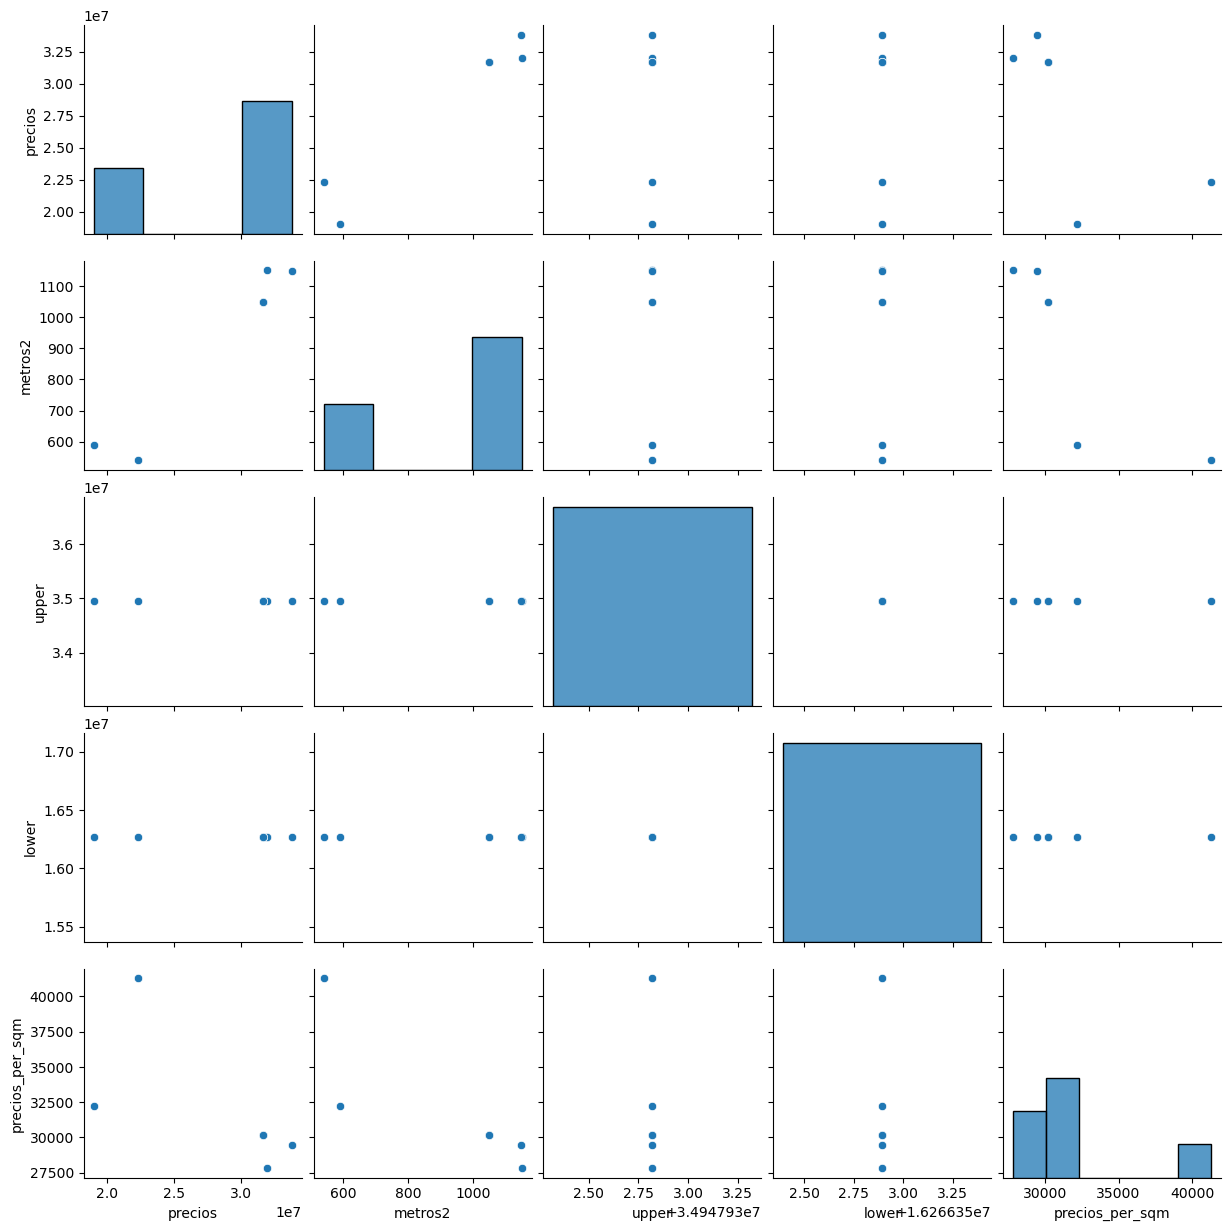

In [36]:
sns.pairplot(by_deleg)

<AxesSubplot:>

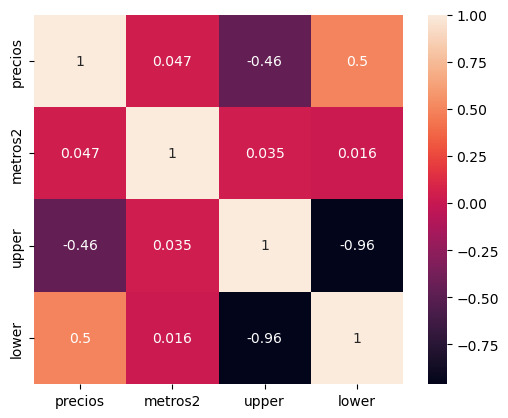

In [37]:
sns.heatmap(ml.corr(), square=True, annot=True)

<AxesSubplot:xlabel='metros2', ylabel='precios'>

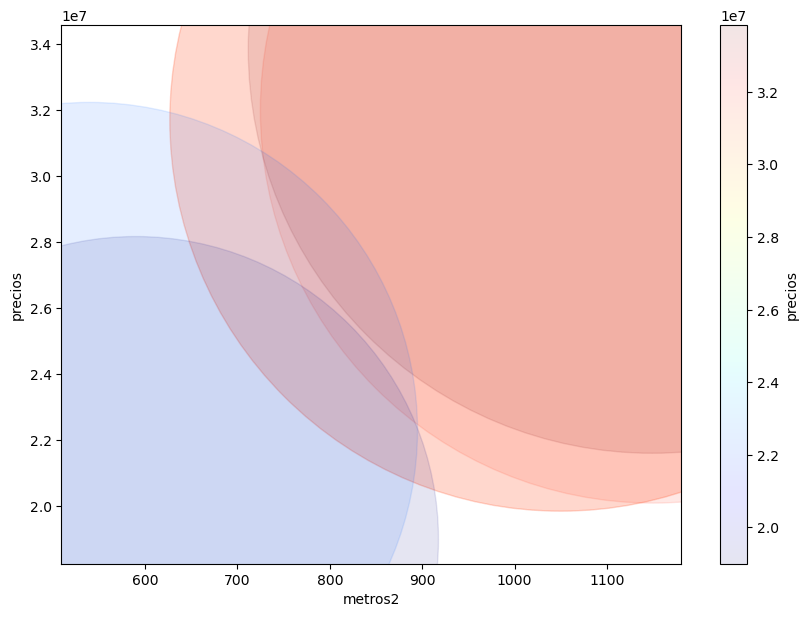

In [38]:
by_deleg.plot(kind='scatter', x='metros2', alpha=0.1, y='precios', figsize=(10,7), s=by_deleg['precios']/100, c='precios', cmap=plt.get_cmap('jet'), colorbar=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


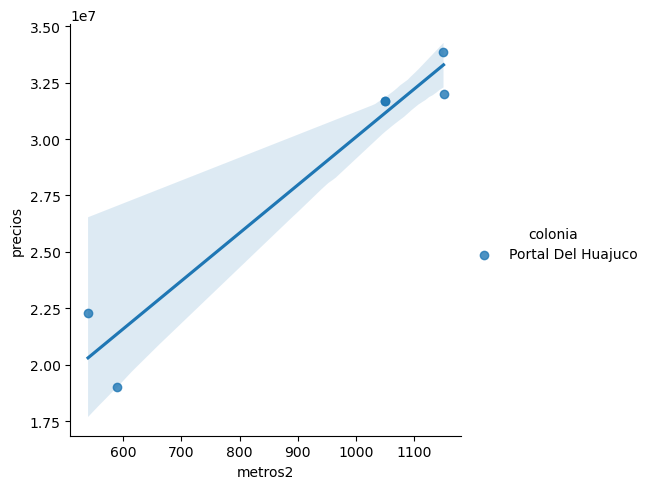

In [39]:
sns.lmplot("metros2", "precios", hue="colonia", data=by_deleg)

In [40]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="cctmexico")
by_deleg.plot = pd.DataFrame({"colonia"})

In [41]:
import time
start =time.time()

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

by_deleg["localitation"] = by_deleg["colonia"].apply(geocode)
by_deleg["lalitude"] = by_deleg["localitation"].apply(lambda x: (x.latitude))
by_deleg["longitude"] = by_deleg["localitation"].apply(lambda x: (x.longitude))
end = time.time()

elapsed = end - start
print (by_deleg)
print (str(elapsed)+"segundos")

                                                titulos  \
1245  Casa En Venta Portal Del Huajuco Carretera Nac...   
1246  Casa En Venta Portal Del Huajuco Carretera Nac...   
1247  Casa En Venta En Portal Del Huajuco, Monterrey...   
1249                Casa En Venta En Portal Del Huajuco   
1250                Casa En Venta En Portal Del Huajuco   
1251                Casa En Venta En Portal Del Huajuco   

                                                   urls   precios  \
1245  https://casa.mercadolibre.com.mx/MLM-949390495...  32000000   
1246  https://casa.mercadolibre.com.mx/MLM-144864125...  31700000   
1247  https://casa.mercadolibre.com.mx/MLM-146668013...  31700000   
1249  https://casa.mercadolibre.com.mx/MLM-159205834...  33850000   
1250  https://casa.mercadolibre.com.mx/MLM-159193678...  19000000   
1251  https://casa.mercadolibre.com.mx/MLM-159194946...  22300000   

                                              direccion  metros2 recamaras  \
1245  Portal Del Huajuco

In [42]:
#revisamos nuestros datos de busqueda
ml.dtypes

titulos       object
urls          object
precios        int32
direccion     object
metros2      float64
recamaras     object
tipo          object
estado        object
colonia       object
ciudad        object
upper        float64
lower        float64
dtype: object

In [43]:
#by_deleg.plot(kind ='scatter', x ='longitude', y ='lalitude', figsize =(10,7))

TypeError: 'DataFrame' object is not callable

In [ ]:
#by_deleg.plot (kind='scatter', x='longitude', alpha=0.1, y='lalitude', figsize = (10,7),s = by_deleg['precios']/100, c='precios', cmap = plt.get_cmap('jet'), colorbar=True)

In [44]:
distritos = by_deleg[['lalitude','longitude']].to_numpy()
distritos

array([[  25.5728009, -100.2255773],
       [  25.5728009, -100.2255773],
       [  25.5728009, -100.2255773],
       [  25.5728009, -100.2255773],
       [  25.5728009, -100.2255773],
       [  25.5728009, -100.2255773]])

In [45]:
from folium import plugins
from folium.plugins import HeatMap
import folium
mapa=folium.Map(location=[25.671, -100.309], zoom_start=6)
HeatMap (distritos, radius=30, max_val=0.1, min_opacity=0.4).add_to(mapa)
mapa

C:\Users\giraz\AppData\Local\Temp\ipykernel_21200\305283032.py:5: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap (distritos, radius=30, max_val=0.1, min_opacity=0.4).add_to(mapa)
